# Aprendizaje No Supervisado

El aprendizaje supervisado generalmente busca relacionar las variables de entrada $\mathbf{x}$ con una variable de salida $\mathbf{y}$. Esto se puede interpretar como el encontrar una transformación de los datos de entrada, de tal forma que se minimice una función de costo determinada para el problema especificco. De esta forma la función de costo, que indica en cierta forma que tan bien se ajustan la predicción de la salida con el valor observado, determina el aprendizaje del metodo bajo estudio.

En aprendizaje no supervisado no se cuenta con una observación deseada, solamente con los datos de entrada, la idea es utilizar algún tipo de herrmaienta para poder encontrar similitudes entre los datos (su estructura interna). Generalmente, estos problemas estan definidos por espacios de entrada de dimensiones mayores a los utilizados en los métodos supervisados.

En este orden de ideas, diferentes tipos de técnicas de aprendizaje no supervisado pueden ser utilizadas para reducir la dimensionalidad de los datos, encontrando manifolds de bajo dimensionalidad (curvas en el espacio) donde estos datos preservan la mayoria de la información que contienen, métodos como PCA, Curvas Principales, Mapas auto-organizados, pueden ser utilizados para disminuir la complejidad de estos datos, i.e. estimar las densidades de probabilidad de los datos en un espacio dimensional más pequeño. Por otro lado, otra aproximación puede ser utilizada para agrupar por algún tipo de medida de smilaridad estos datos en grupos similares. En este ultimo caso las técnicas de agrupamiento (clustering) como k-means, k-medoids o agrupamiento jerarquico (hierarchical clustering) pueden ser utilizadas, de forma que la densidad de probabilidad de los datos de entradas se expresa como una mezcla de distribución de densidades más simples relacionadas con datos de diferentes grupos.

La falta de una medida de rendimiento en los métodos de aprendizaje no supervisado ha hecho que los resultados se evaluen desde un putno de vista más subjetivo, lo cual ha insentivado la proliferación de muchos métodos.


## Analísis de Clusters

El analísis de clusters también se conoce como Segmentación de datos. La idea de estos algoritmos es segmentar los datos en grupos de datos comunes, de tal forma que los datos pertenecientes a un mismo grupo estan más relacionados entre si, que con datos que pertenecen a otro grupo.

Un dato (observación u objeto) puede estar caracterizado por un conjunto de valores, o por su relación con otros objetos. en el último caso se expresaria esa relación a traves de una medida de similaridad. A partir de esas medida de similaridad entre objetos se puede crear lo que se conoce como una matriz de adyacencia (de similitud, similaridad, proximidad), la cual puede ser utilizada también desde el punto de vista de grafos.

Una de las métodologias ya estudiadas que se utiliza para realizar clustering es **k-means**, este método se clasifica entre los algortimos de clustering del tipo *top-down*, es decir que primero define unos grupos y con base en el criterio dado modifica los centroides de los grupos hasta que llega a un valor que minimiza la función de costo asociada al problema. Otras metodologias se aproximan al problema de segmentación por medio de métodos *bottom-up*, estas empiezan a agrupar unos pocos elementos y el tamaño de los clusters va creciendo a medida que se hace entrenamiento.

### Matrices de Proximidad

Muchas veces los datos utilizados tienen una dimensionalidad muy grande, por lo cual puede que se haga un poco problematico trabajar con estos valores. Además se hace dificil de forma visual poder generar una idea de como estan distribuidos los datos. En estos casos se hace util generar una matriz de proximidad que indica, a travez de una medida de similaridad, como dos objetos (muestras) del conjunto de datos estan relacionados. 

Supongamos que se tiene un conjunto de entrenamiento $\mathbf{X} \in \mathbb{R}^{N\times d}$, donde $N$ es el número de observaciones, y $d$ es la dimensionalidad de cada observación (cantidad de atributos medidos para un objeto). Sea $d_{ij}$ una medida de similaridad entre la observacion $i$ y la observación $j$, e.g. la fila $i$ y la fila $j$ de la matriz $\mathbf{X}$.

**Pregunta:** ¿Qué tipo de medidas de similaridad se pueden usar?

**Solución:** La medida de similaridad puede ser una distancia (euclidea, de manhattan, etc..), una medida de correlación, coherencia, entropía mutua, entropía de transferencia, etc.... 

De esta forma, se puede formar una matriz de similaridad $\mathbf{D} \in \mathbb{R}^{N\times N}$, con elemetos $d_{ij}$, donde $i$ define la fila y $j$ la columna de la matriz y representa la medida de similaridad entre $\mathbf{x}_i$ y $\mathbf{x}_j$, filas $i$ y $j$ de la matriz $\mathbf{X}$.

Las matrices de proximidad generadas en su mayoría son simetricas, si la matrix utilizada no es simetrica, y el algortimo requiere que lo sea, se puede transformatr a una matrix simetrica mediante la transformación $\mathbf{\hat{D}}=(\mathbf{D}+\mathbf{D}^{\text{T}})/2$. Aveces también su usan matrices de disimilaridad, las cuales indican que tan dissimilares son dos observaciones. 

## K-means

El algortimo de K-means busca segmentar los datos en grupos (cluster) de observaciones, de tal forma que la distancia euclidea entre las observaciones del mismo grupo sea pequeña y la distancia euclidea entre observaciones de diferentes grupos sea grande.

<img src="img/k-means.png" width="400">

Revicemos un ejercicio donde tenemos 4 clusters y observemos como luce la matriz de disimilaridades utilizando la distancia euclidea. Luego organicemos los datos por clusters y veamos como se ve la matriz organizada. Repitamos el procedimiento ahora con una medida de similaridad (cosine similarity - correlación)

Text(0, 0.5, 'Caracteristica 2')

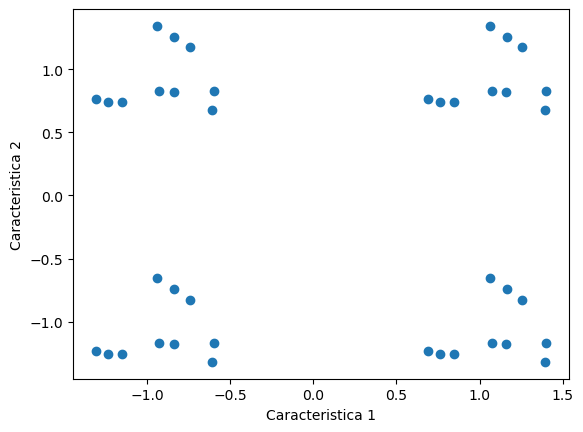

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Creando la dispercion de lso datos
data = np.random.rand(10,2);
data = data-data.mean()

# Creando 4 clases centradas en diferentes puntos del plano 
X1 = 0.8*data+[1,1]
X2 = 0.8*data+[-1,1]
X3 = 0.8*data+[-1,-1]
X4 = 0.8*data+[1,-1]

# Construyendo la matrix de carcteristicas y mezclando aleatoriamente los datos
X = np.concatenate((X1,X2,X3,X4),axis=0)
Xt = X.copy()
np.random.shuffle(Xt)

# Graficando los datos
plt.scatter(Xt[:,0],Xt[:,1])
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

kmeans = KMeans(n_clusters=4).fit(Xt)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.08111385 -1.08111385]
 [-0.91888615  0.91888615]
 [ 1.08111385  0.91888615]
 [-0.91888615 -1.08111385]]


/Users/acaicedo/miniforge3/envs/env_Torch/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


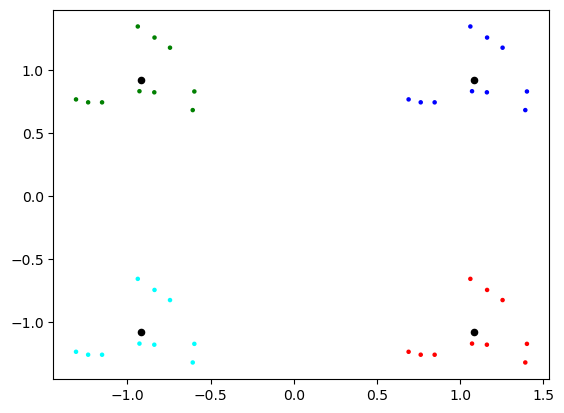

In [3]:
# Prediciendo los grupos
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

Ahora vamos a observar la matriz de similaridad de los datos de entrenamiento

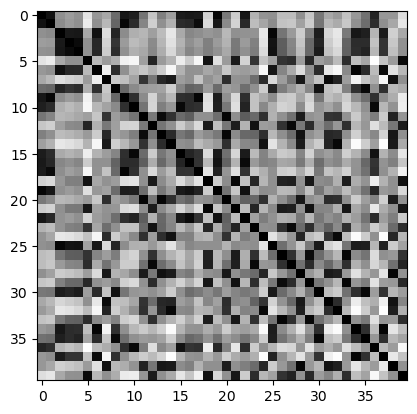

In [4]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(Xt, Xt, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

**Pregunta:** ¿Cómo luce la matriz si lo acomodamos los datos en orden, colocando primero los valores qu epertenecen a un cluster, luego los del cluster 2, etc...?

**Solución:** Para hacer esto calculamos la matriz de distancias utilizando la matriz de observaciones $\mathbf{X}$. De esta forma obtenemos lo siguiente

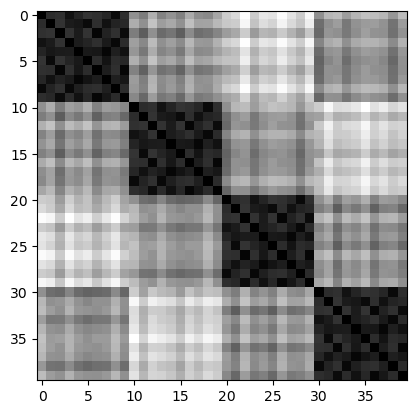

In [5]:
D = pairwise_distances(X, X, metric='euclidean')
D = D/D.max()
plt.imshow(D,cmap='gray')

**Pregunta:** ¿Qué puede observar de est amatriz ordenada?

**Solución:** Aqui se puede ver que los grupos generarn una estructura en la matriz de dissimilaridades.

Ahora revisemos la matriz de correlaciones

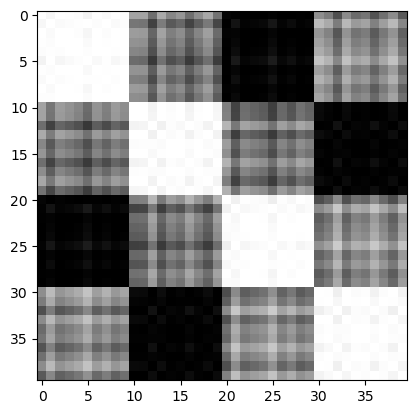

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
#D = np.abs(cosine_similarity(X, X))
D = cosine_similarity(X, X)
D = (D+1)/2
plt.imshow(D,cmap='gray')

**Pregunta:** ¿Que opinan?

### K-medoids

K-means funciona muy bien cuando se toma como medida de dissimilaridad la distancia euclidea. Sin embargo, esta distancia esta sesgada por distancias grandes, y valores que tengan distancias pequeñas no van a afectar mucho la función de costo. Por esta razón, cuando se tienen outliers k-means no es robusto.

Si se generaliza k-means para tomar cualquier otro tipo de medida de dissimilaridad se puede llegar a un algoritmo un poco más robusto, de esta forma se obtiene el algoritmo de k-medoids.

<img src="img/k-medoids.png" width="400">

En este algoritmo, el centroide de los datos no se asume como la media aritmetica de los datos, sino el elemento que más cercano se encuentre a este valor.

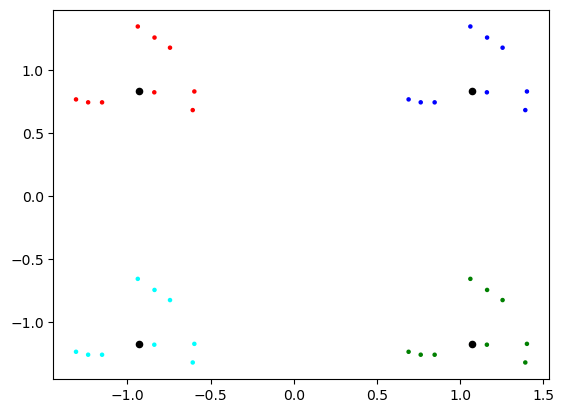

In [7]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=4, random_state=0).fit(Xt)
labels = kmedoids.predict(Xt)

C = kmedoids.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xt[:, 0], Xt[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)


Text(0, 0.5, 'Caracteristica 2')

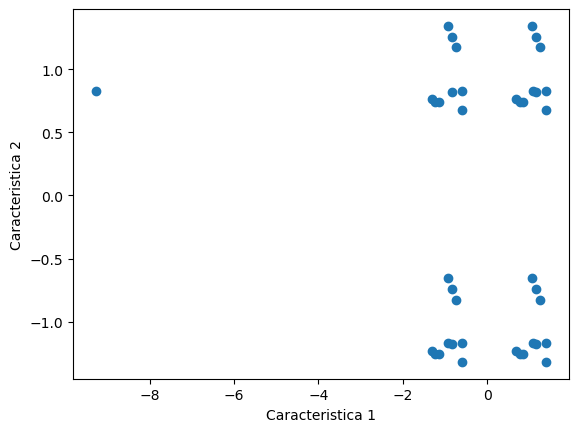

In [8]:
Xp = Xt.copy()
Xp[0,0] = 10*Xp[0,0]

# Graficando los datos
plt.scatter(Xp[:,0],Xp[:,1])
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')

/Users/acaicedo/miniforge3/envs/env_Torch/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


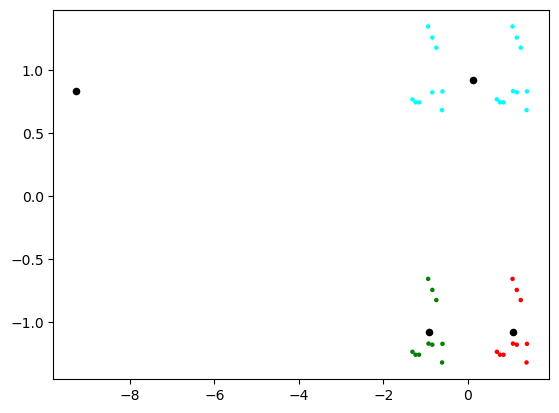

In [9]:
kmeans = KMeans(n_clusters=4).fit(Xp)

labels = kmeans.predict(Xp)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xp[:, 0], Xp[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

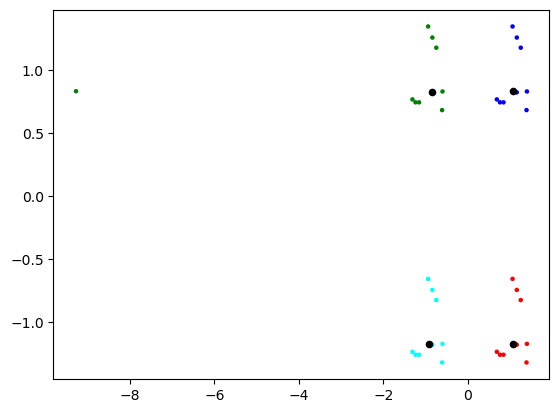

In [10]:
kmedoids = KMedoids(n_clusters=4, random_state=2).fit(Xp)
labels = kmedoids.predict(Xp)

C = kmedoids.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.figure()
plt.scatter(Xp[:, 0], Xp[:, 1], c=asignar,s=5)
plt.scatter(C[:, 0], C[:, 1], marker='o', c='black', s=20)

**Pregunta:** ¿Qué pueden observar del comportamiento de k-means y de k-medoids?

**Solución:** se puede ver que k-medoids es más robusto que k-means.

### Cómo seleccionar el numero de clusters

Existen varias formas de seleccionar el número de clusters:
1. Dado por el problema: El problema indica el número de clusters que se deben utilizar
2. Basados en datos: Una medida que concoen es el elbow. Sin embargo, existe otra que ha cobrado mucha fuerza. Esta se denomina *Gap statistics*.

### Gap Statistics: 

El gap statistics mide la variación de la variabilidad entre las observaciones de los clusters a medida que $k$ aumenta. Esta variabilidad decrece con $k$. De forma practica, para valores de $k$ menores al óptimo número de grupos este decrecimiento es rápido, porque a medida que aumento el $k$ las observaciones se van acercando al agrupamiento establecido por los datos. Mientras que para valores de $k$ mayores al valor optimo esto hará que la intravariabilidad de los clusters disminuya de forma lenta.

EL criterio del gap, lo que realiza es comparar la variación logaritmica de esta variabilidad de las observaciones de cada cluster vs la variabilidad observada en el agrupamiento de datos aleatorios distribuidos uniformemente sobre el espacio de variación de los datos. Y estima el numero de clusters optimo como el valor de $k$ que produce la maxima distancia entre las dos curvas, a esa diferencia se le denomina el *gap*.

<img src="img/gap.png" width="800">

Existen otras formas de estimar ese número de clusters, si vemos la matriz de proximidades, ahi se puede ver que existen 4 regiones dominantes, estas regiones representan una especie de eigenvectores necesarios para poder hacer una reconstrucción de bajo rango de la matriz. Por lo tanto observando los eigenvalores de la matriz de adyacencia se pueden determinar cuantos eigenvectores se necesita para aproximar esta matrix, y con base en eso definir el numero de clusters.

## Hierarchical Clustering

El agrupamiento jerarquico no necesita que se especifique el número de clusters necesarios para poder realizar el agrupamiento. Para este metodo solo basta con asignar una medida de similaridad que se utilizara para comparar las observaciones. La idea detras de este metodo es que establece una jerarquia para las agrupaciones, al nivel mas bajo se encuentran los datos, al siguiente nivel agrupa las observaciones cuya medida de disimilaridad sea menor a un umbra $T_0$, al siguiente nivel agrupa los subgrupos cuya medida de dissimilaridad es mayour a un umbral $T_1$, con $T_0<T_1$, y asi sucesivamente. De esta forma a un nivel de jerarquia $i$ determinado, los grupos que se forman son aquellos cuya medida de dissimilaridad es menor al umbral $T_{i-1}$.

Se puede representar de forma gráfica cuando dos puntos, o subgrupos son unidos por medio de lineas, formando un diagrama de representación de agrupamiento en cada nivel. A este diagrama se le conoce como un **dendrograma** y puede ser utilizado para evaluar el comportamiento del algoritmo y la métrica utilizada.


<img src="img/jerarquico.png" width="500">

Uno puede utilizar la informacion de las muestras que se agrupan y de esta forma revelar información sobre las caracteristicas de los datos. Tal como se meustra en esta imagen de agrupamiento de expresion de genes.

<img src="img/genes.png" width="500">

## ¿Cómo evaluar que tan bueno es un algoritmo de clustering?

Normalmente la validación de un algoritmo de clustering es subjetiva. Sin embargo, existe un método para determinar que tan consistente es el agrupamiento obtenido con estos algoritmos. Este método se conoce como la **Silueta**

### Silueta

La silueta es un metodo que sirve para determinar de forma visual, que tan bien los elementos de un cluster han sido agrupados, esto se mide por medio de una metrica que índica que tan similar es una observación a su propio grupo, comparada con los otros grupos (Cohesion vs Separacion). El valor de la silueta varia desde -1 a 1, donde valores positivos altos indican que la observación se parece a su grupo y difiere de los demas grupos, y valores negativos altos indican que la observación se parece más a datos de otros grupos. Si existen muchos valores negativos de silueta para elementos dentro de un cluster, es una indicación de que se debe aumentar el numero de grupos. 

Para obtener la medida de distancia se utiliza:

$$a(i) = \frac{1}{|C_i|-1}\sum_{j\in C_i,i~=j}d(i,j)$$

donde $a(i)$ es la distancia media del punto $i$ a los demás puntos dentro de su cluster. $|C_i|$ es el número de puntos dentros del cluster al que pertenece el punto $i$.

Ahora se mide la dissimilaridad de ese punto con los puntos de los otros clusters

$$b(i) = \min_{k~=i}\frac{1}{|C_k|}\sum_{j\in C_k}d(i,j)$$

en este caso se escoje la distancia minima promedio del punto $i$ a los demas clusters.

La silueta se define como:

$$s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$$

si $|C_i| > 1$, 

o $s(i)=0$ si $|C_i| = 1$.

Lo cual se puede resumir a:

$$
\begin{equation}
  \hat{s(i)} =
    \begin{cases}
      1 -a(i)/b(i)& \text{if} & a(i)<b(i)\\
      0 & \text{if} & a(i) = b(i)\\
      b(i)/ a(i)-1 & \text{if} & a(i)>b(i)
    \end{cases}       
\end{equation}$$

Una gráfica de silueta luce así:

<img src="img/silueta.png" width="500">

## Tarea

Busque algunos datos en internet para realizar clustering y con ellos:

1. implemente el algoritmo de k-means desde cero.
2. Compare el algoritmo que usted implemento con el que tiene la libreia de scikit-learn.
2. Use k-medoids en lso datos utilizando la función de la librería de scikit-learn.
3. Compare los resultados de k-meadios y k-means.
3. Use clustering jerarquico con la función de la librería de scikit-learn.
4. Evalue el rendimiento de todos los métodos utilizando la silueta.
